In this notebook , we will just explore the data to come up with a pipeline for data pre processsing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def cat_plot_count_avgPrice(df, column):
    fig, axes = plt.subplots(2,1,figsize=(10,10))
    sns.countplot(data=df,x = column, ax=axes[0],  palette="viridis" )
    axes[0].set_title(f"Histogram for: {column}")
    order = df.groupby(column)['Price'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x = column, y='Price', order=order, ax=axes[1], palette="viridis")
    axes[1].set_title(f"Avg price  for: {column}")
    axes[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

In [3]:
def num_plot_dist(df, column):
    fig, axes = plt.subplots(2,1,figsize=(15,10))
    sns.kdeplot(x=df[column], ax=axes[0],fill=True,  color="blue" )
    axes[0].set_title(f"KDE plot for: {column}")
    sns.boxplot(x=df[column], ax=axes[1], color='red')
    axes[1].set_title(f"Box plot  for: {column}")
    axes[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

def count_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Number of outliers in {column}: {outliers.shape[0]}")
        return outliers

In [4]:
df = pd.read_csv('laptopData.csv')
print(df.head(5))
df.drop(columns='Unnamed: 0', inplace=True)
print(df.columns)
df.dropna(inplace=True)
print(df.dtypes)

   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  

Let's take a look at company :

In [5]:
print(df['Company'].unique())
print(df['Company'].value_counts())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = column, ax=axes[0],  palette="viridis" )
C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = column, y='Price', order=order, ax=axes[1], palette="viridis")


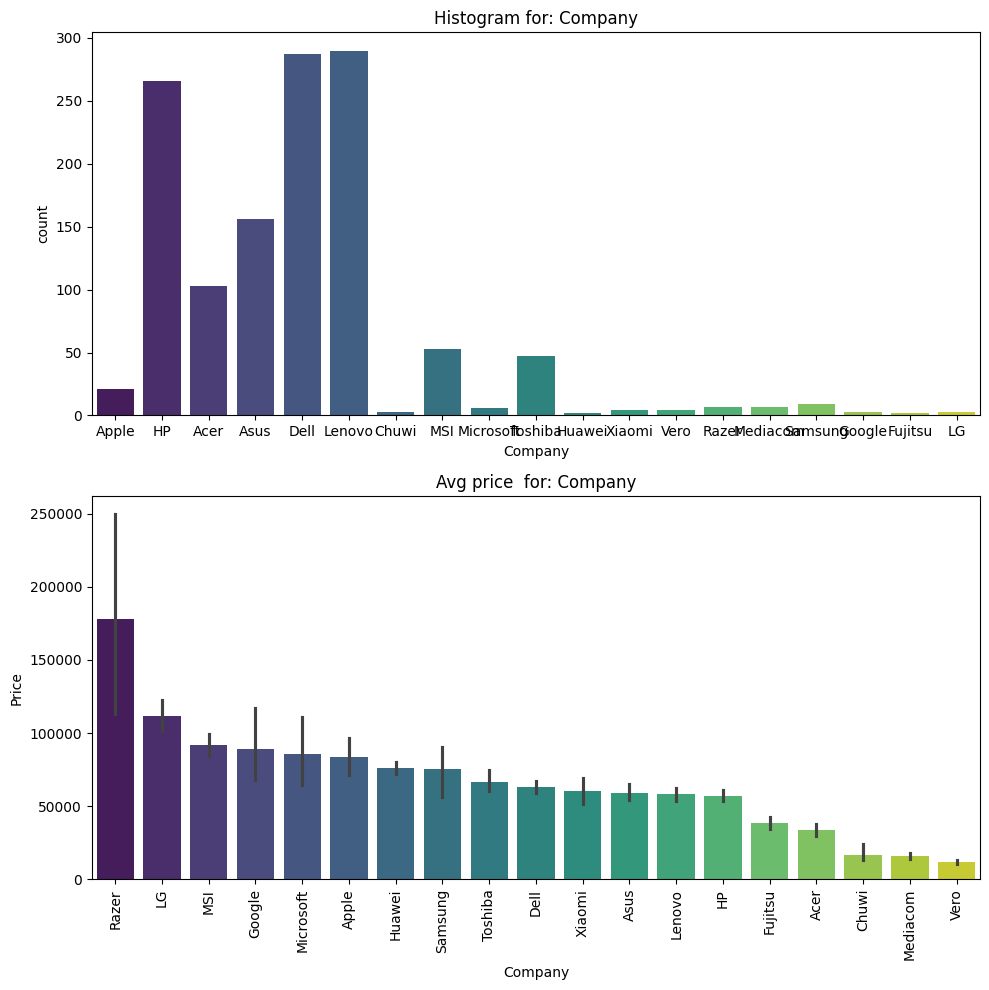

In [6]:
cat_plot_count_avgPrice(df,'Company')

Remarks :some categories are very sparse and may need to be grouped into an "others category"

Typename exploration :

In [7]:
print(df['TypeName'].value_counts())

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64


C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = column, ax=axes[0],  palette="viridis" )
C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = column, y='Price', order=order, ax=axes[1], palette="viridis")


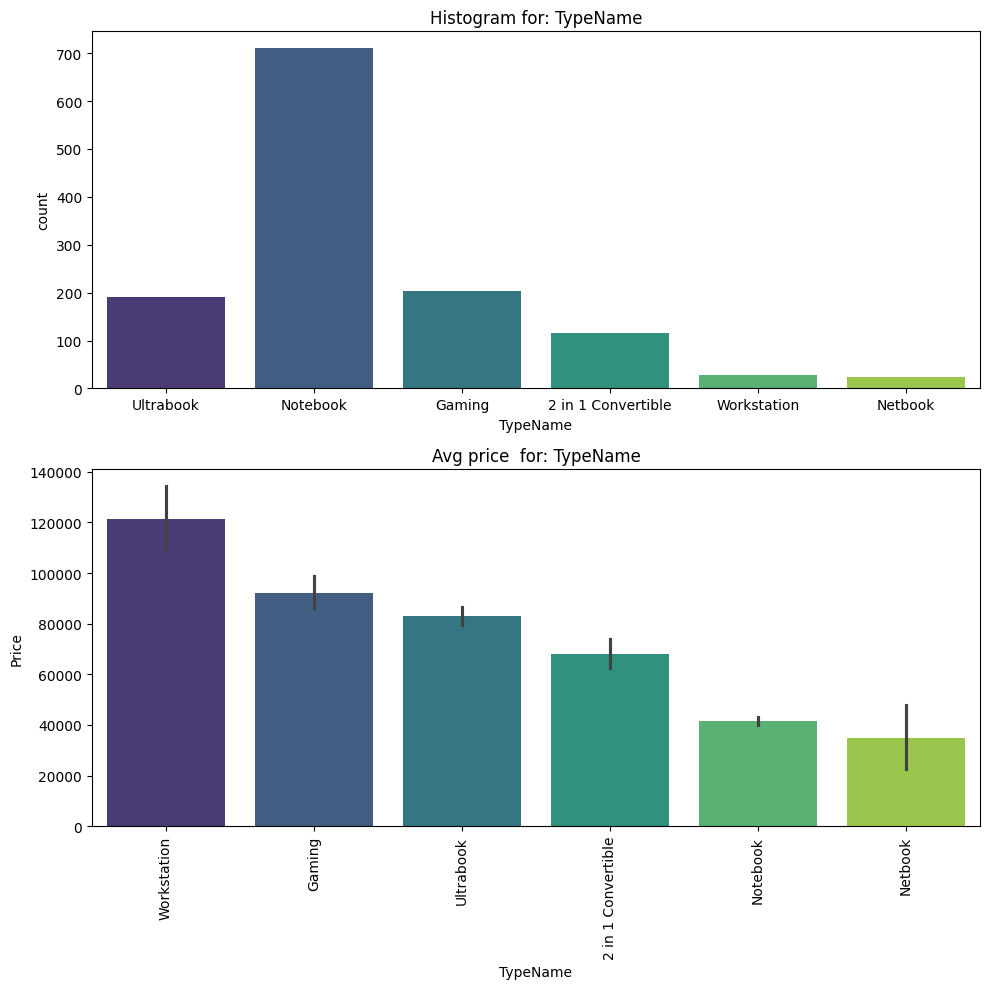

In [8]:
cat_plot_count_avgPrice(df, 'TypeName')

Remark : need to merge notebook and netBook 

Inches exploration :

In [9]:
print(df['Inches'].value_counts())
df['Inches']= pd.to_numeric(df['Inches'], errors='coerce')
df['Inches']=df['Inches'].fillna(df['Inches'].mean())

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
10.1      3
35.6      3
13        2
24        2
18.4      1
27.3      1
25.6      1
33.5      1
?         1
17        1
31.6      1
14.1      1
11.3      1
Name: count, dtype: int64


Some values are in cm and need to be converted to inch 

In [10]:
df['Inches']=df['Inches'].apply(lambda x : float(x/2.54) if x > 17.5 else x)

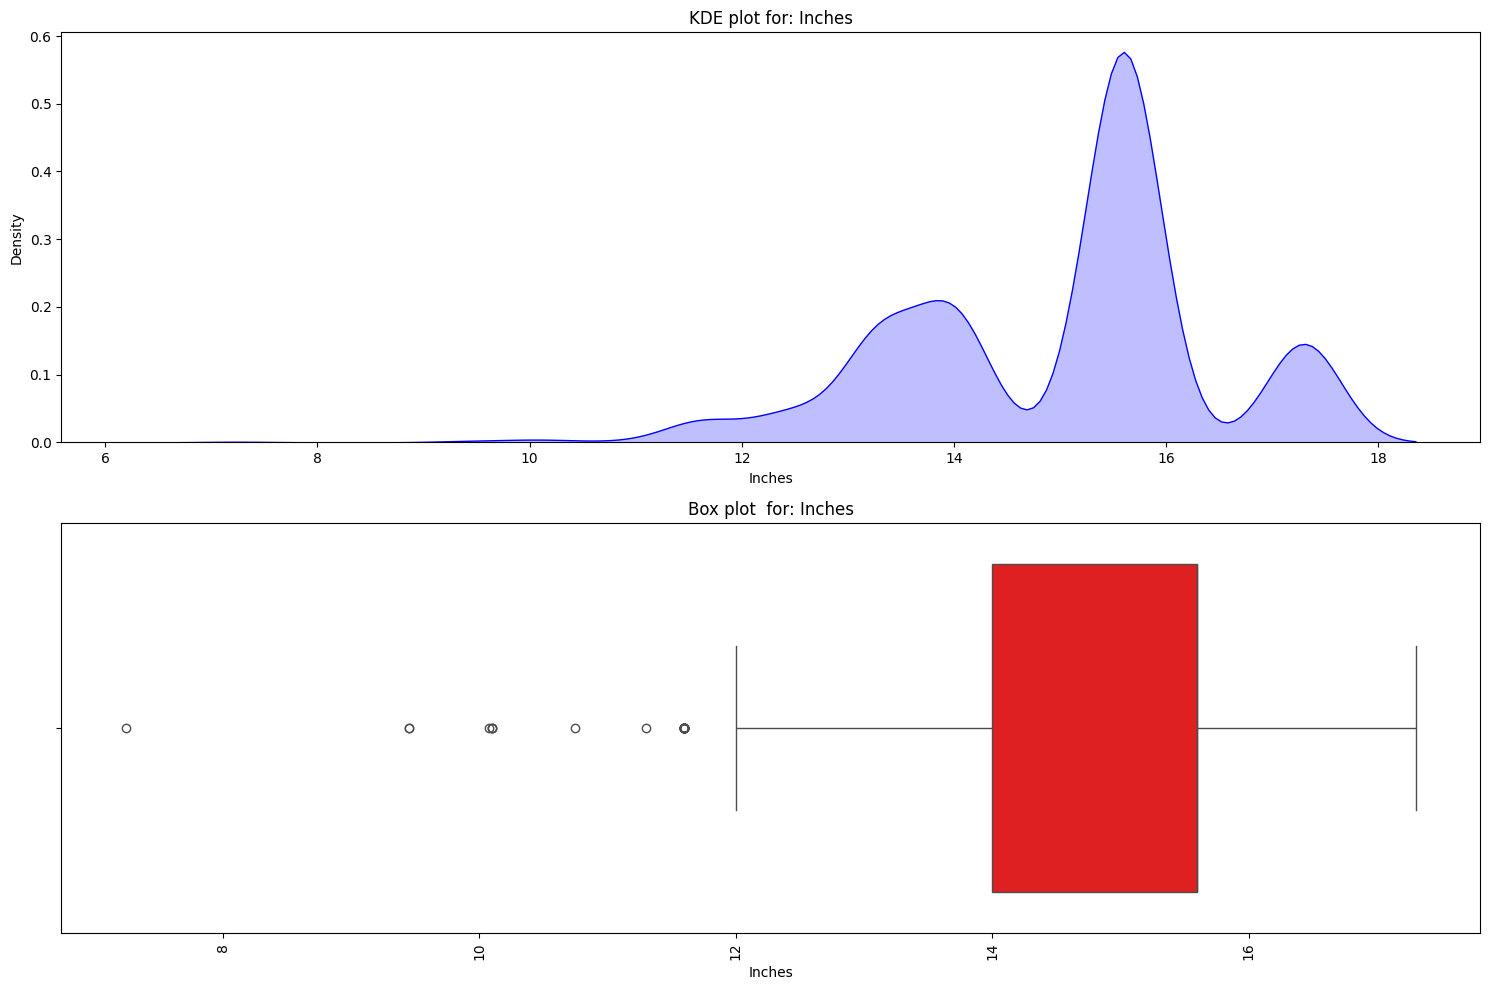

In [11]:
num_plot_dist(df, 'Inches')

In [12]:
print(len(count_outliers(df, 'Inches')))
print(df['Inches'].value_counts())

Number of outliers in Inches: 40
40
Inches
15.600000    640
14.000000    192
17.300000    162
13.300000    161
12.500000     38
11.600000     31
12.000000      6
13.900000      6
13.500000      5
12.300000      5
15.400000      4
15.000000      4
10.100000      3
14.015748      3
13.000000      2
9.448819       2
7.244094       1
10.748031      1
10.078740      1
13.188976      1
15.130818      1
17.000000      1
12.440945      1
14.100000      1
11.300000      1
Name: count, dtype: int64


Many Outliers in the data , a bit of a left skew 

Screen Resolution exploration :

In [13]:
print(df["ScreenResolution"].value_counts())

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

Can extract features like pixels per sq inch , IPS , touchscreen from this 

CPu Exploration

In [14]:
print(df['Cpu'].value_counts())
print(df['Cpu'].unique())

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series

Can get features like speed , brand name and type

Ram Explore:

In [15]:
print(df['Ram'].unique())

['8GB' '16GB' '4GB' '2GB' '12GB' '64GB' '6GB' '32GB' '24GB' '1GB']


need to replace GB to make numeric 

In [16]:
df['Ram']=pd.to_numeric(df['Ram'].str.replace('GB','').str.strip(),errors='coerce').astype('int32')

Memory exploration :

In [17]:
print(df['Memory'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '128GB SSD +  1TB HDD'
 '256GB SSD +  256GB SSD' '64GB Flash Storage' '32GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD' '?'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


can extract amount of ssd , hss and flash storage 

GPU explore :

In [18]:
print(df['Gpu'].unique())

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Nvidia GeForce GTX 1050'
 'AMD Radeon R2' 'AMD Radeon 530' 'Nvidia GeForce 930MX'
 'Intel HD Graphics' 'Intel HD Graphics 500' 'Nvidia GeForce 930MX '
 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Intel HD Graphics 400'
 'Nvidia GeForce MX130' 'AMD R4 Graphics' 'Nvidia GeForce GTX 940MX'
 'AMD Radeon RX 560' 'Nvidia GeForce 920M' 'AMD Radeon R7 M445'
 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M' 'Intel HD Graphics 515'
 'AMD Radeon R5 M420' 'Intel HD Graphi

Too many for one hot encoding , need to split to intel , MAD and Nvidia

In [19]:
print(df['OpSys'].unique())
print(df['OpSys'].value_counts())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Windows 10 S'
 'Chrome OS' 'Windows 7' 'Android']
OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64


C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x = column, ax=axes[0],  palette="viridis" )
C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\3975574404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = column, y='Price', order=order, ax=axes[1], palette="viridis")


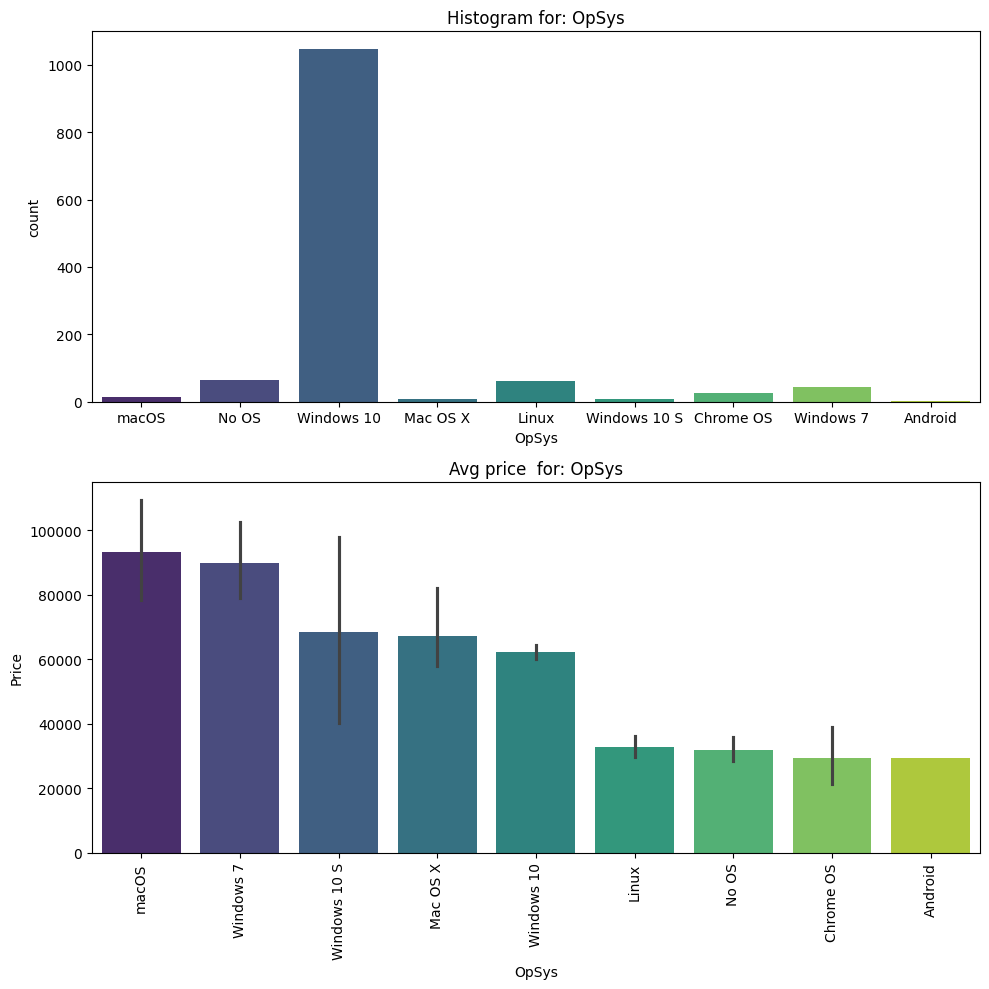

In [20]:
cat_plot_count_avgPrice(df, 'OpSys')

Can group to windows , mac and others 

Weight Exploration :

In [21]:

df['Weight']=pd.to_numeric(df['Weight'].str.replace('kg','').str.strip(),errors='coerce').astype('float32')
print(df['Weight'].unique())
print(df['Weight'].value_counts())
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
print(df['Weight'].isnull().sum())

[1.370e+00 1.340e+00 1.860e+00 1.830e+00 2.100e+00 2.040e+00 1.300e+00
 1.600e+00 2.200e+00 9.200e-01 1.220e+00 2.500e+00 1.620e+00 1.910e+00
 2.300e+00 1.350e+00 1.880e+00 1.890e+00 1.650e+00 2.710e+00 1.200e+00
 1.440e+00 2.800e+00 2.000e+00 2.650e+00 2.770e+00 3.200e+00 1.490e+00
 2.400e+00 2.130e+00 2.430e+00 1.700e+00 1.400e+00 1.800e+00 1.900e+00
 3.000e+00 1.252e+00 2.700e+00 2.020e+00 1.630e+00 1.960e+00 1.210e+00
 2.450e+00 1.250e+00 1.500e+00 2.620e+00 1.380e+00 1.580e+00 1.850e+00
 1.230e+00 2.160e+00 2.360e+00 7.200e+00 2.050e+00 1.320e+00 1.750e+00
 9.700e-01 2.560e+00 1.480e+00 1.740e+00 1.100e+00 1.560e+00 2.030e+00
 1.050e+00 5.400e+00 4.400e+00 1.290e+00 1.950e+00 2.060e+00 1.120e+00
 3.490e+00 3.350e+00 2.230e+00       nan 2.900e+00 4.420e+00 2.690e+00
 2.370e+00 4.700e+00 3.600e+00 2.080e+00 4.300e+00 1.680e+00 1.410e+00
 4.140e+00 2.180e+00 2.240e+00 2.670e+00 4.100e+00 2.140e+00 1.360e+00
 2.250e+00 2.150e+00 2.190e+00 2.540e+00 3.420e+00 5.800e+00 1.280e+00
 2.330

C:\Users\tanji\AppData\Local\Temp\ipykernel_21592\1476075424.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].mean(), inplace=True)


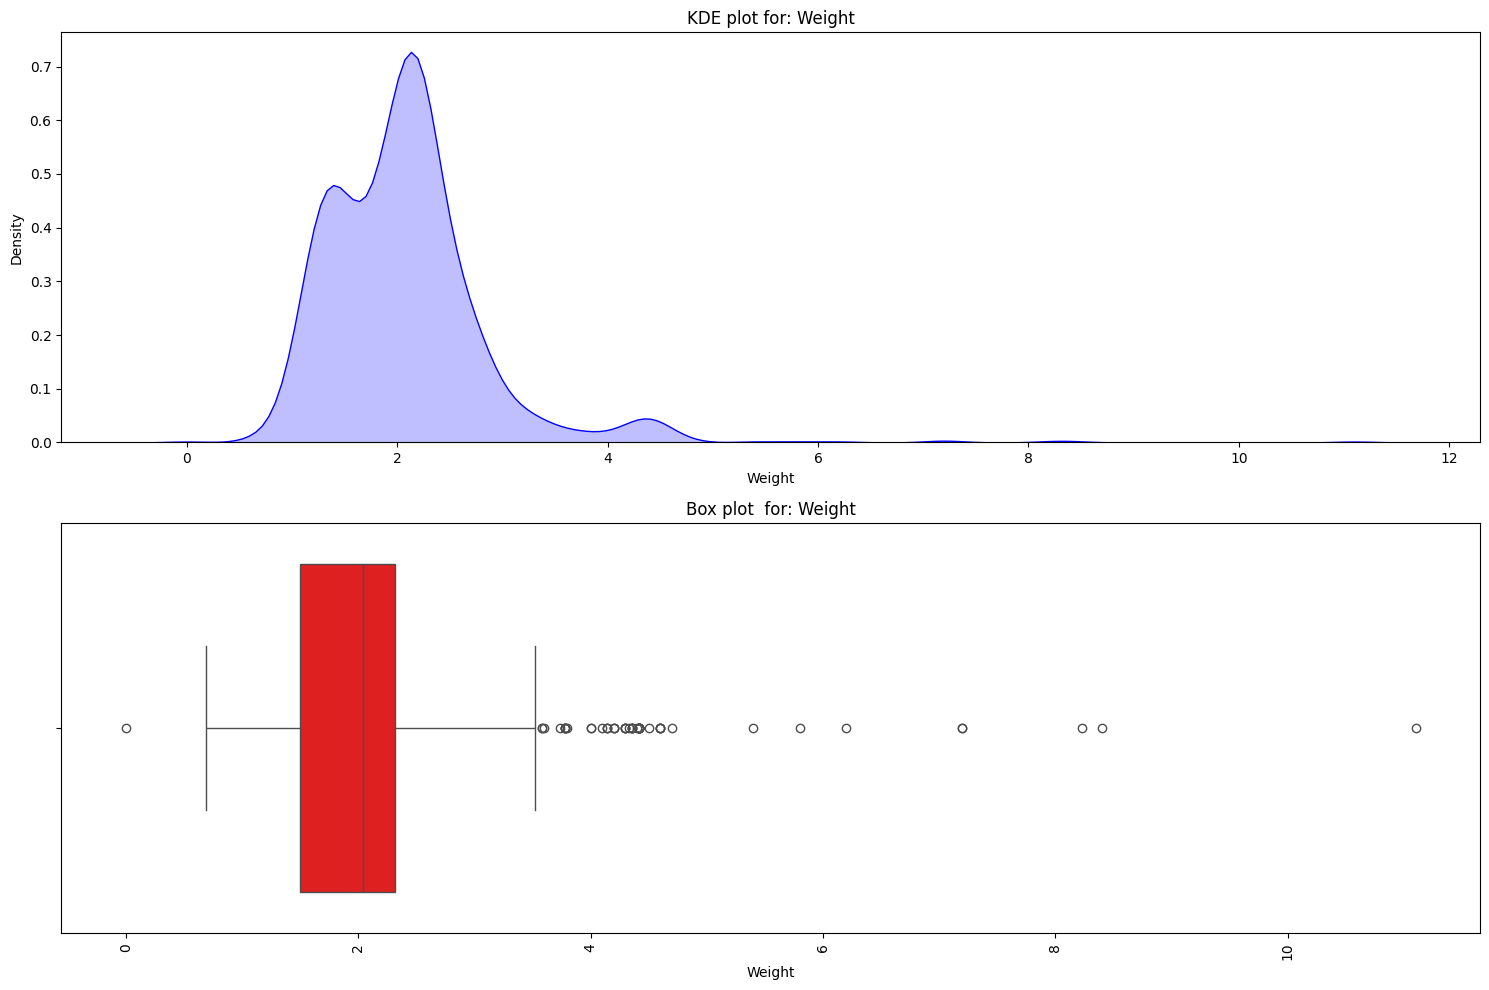

In [22]:
num_plot_dist(df, 'Weight')

Price Dist :

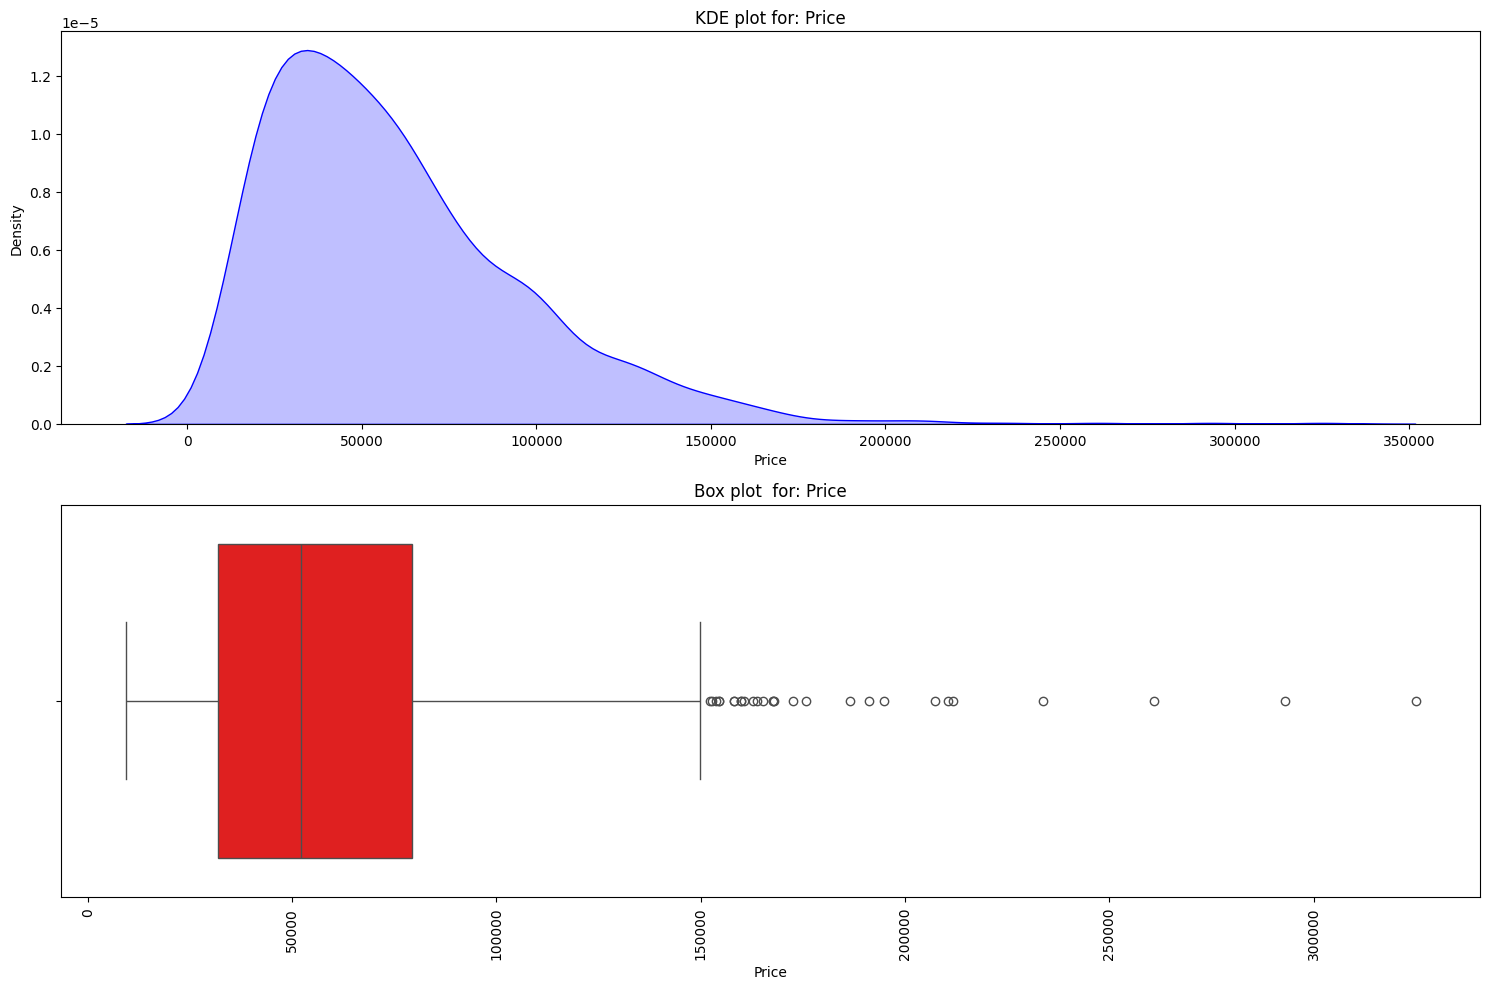

In [23]:
num_plot_dist(df,'Price')

Right Skewed , Need to lookup if doing a log ttansform might help 

check for skewness :

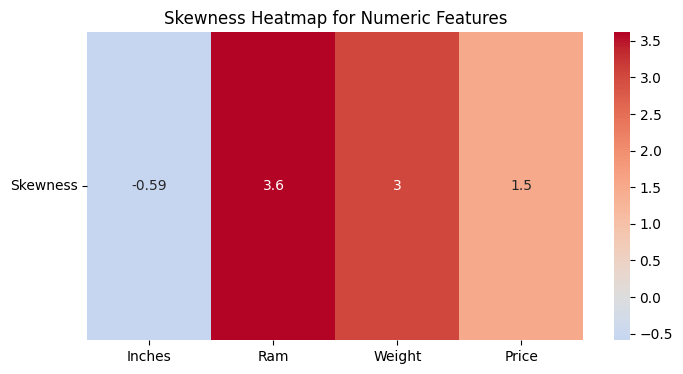

In [24]:

# Get skewness for all numeric columns
skew_vals = df.skew(numeric_only=True)

# Convert to DataFrame for heatmap
skew_df = pd.DataFrame(skew_vals, columns=['Skewness'])

# Plot heatmap
plt.figure(figsize=(8, len(skew_df) * 0.5 + 2))
sns.heatmap(skew_df.T, annot=True, cmap='coolwarm', center=0)
plt.title('Skewness Heatmap for Numeric Features')
plt.yticks(rotation=0)
plt.show()